# Document an Credit Risk Model

Build and document an *credit risk model* with the ValidMind Developer Framework by using Kaggle's [German Credit Risk](https://www.kaggle.com/datasets/uciml/german-credit/data) sample dataset to build a simple credit risk model.

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

This interactive notebook provides a step-by-step guide for loading a demo dataset, preprocessing the raw data, training a model for testing, setting up test inputs, initializing the required ValidMind objects, running the test, and then logging the results to ValidMind.

## Contents    
- [About ValidMind](#toc1_)    
  - [Before you begin](#toc1_1_)    
  - [New to ValidMind?](#toc1_2_)    
  - [Key concepts](#toc1_3_)    
- [Install the client library](#toc2_)    
- [Initialize the client library](#toc3_)    
- [Initialize the Python environment](#toc4_)    
  - [Preview the documentation template](#toc4_1_)    
- [Load the sample dataset](#toc5_)    
  - [Prepocess the dataset](#toc5_1_)    
  - [Feature engineering](#toc5_2_)    
- [Train the model](#toc6_)    
  - [Compute probabilities](#toc6_1_)    
  - [Compute binary predictions](#toc6_2_)    
  - [Compute scores](#toc6_3_)    
- [Document the model](#toc7_)    
  - [Initialize the ValidMind datasets](#toc7_1_)    
  - [Initialize a model object](#toc7_2_)    
  - [Assign prediction values and probabilities to the datasets](#toc7_3_)    
  - [Assign scores to the datasets](#toc7_4_)    
  - [Data validation](#toc7_5_)    
    - [Run tests for raw data tests](#toc7_5_1_)    
    - [Run tests for preprocessed data](#toc7_5_2_)    
    - [Run tests for WoE analysis](#toc7_5_3_)    
  - [Model validation](#toc7_6_)    
    - [Run tests for model training](#toc7_6_1_)    
    - [Run tests for model evaluation](#toc7_6_2_)    
    - [Run tests for model explainability](#toc7_6_3_)    
- [Next steps](#toc8_)    
  - [Work with your model documentation](#toc8_1_)    
  - [Discover more learning resources](#toc8_2_)   

<a id='toc1_'></a>

## About ValidMind
ValidMind is a platform for managing model risk, including risk associated with AI and statistical models.

You use the ValidMind Developer Framework to automate documentation and validation tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

<a id='toc1_1_'></a>

### Before you begin
This notebook assumes you have basic familiarity with Python, including an understanding of how functions work. If you are new to Python, you can still run the notebook but we recommend further familiarizing yourself with the language.

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).

<a id='toc1_2_'></a>

### New to ValidMind?
If you haven't already seen our [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/developer/get-started-developer-framework.html), we recommend you begin by exploring the available resources in this section. There, you can learn more about documenting models, find code samples, or read our developer reference.


### Key concepts

**Model documentation**: A structured and detailed record pertaining to a model, encompassing key components such as its underlying assumptions, methodologies, data sources, inputs, performance metrics, evaluations, limitations, and intended uses. It serves to ensure transparency, adherence to regulatory requirements, and a clear understanding of potential risks associated with the model’s application.

**Documentation template**: Functions as a test suite and lays out the structure of model documentation, segmented into various sections and sub-sections. Documentation templates define the structure of your model documentation, specifying the tests that should be run, and how the results should be displayed.

**Tests**: A function contained in the ValidMind Developer Framework, designed to run a specific quantitative test on the dataset or model. Tests are the building blocks of ValidMind, used to evaluate and document models and datasets, and can be run individually or as part of a suite defined by your model documentation template.

**Custom tests**: Custom tests are functions that you define to evaluate your model or dataset. These functions can be registered with ValidMind to be used in the platform.

**Inputs**: Objects to be evaluated and documented in the ValidMind framework. They can be any of the following:

- **model**: A single model that has been initialized in ValidMind with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model).
- **dataset**: Single dataset that has been initialized in ValidMind with [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset).
- **models**: A list of ValidMind models - usually this is used when you want to compare multiple models in your custom test.
- **datasets**: A list of ValidMind datasets - usually this is used when you want to compare multiple datasets in your custom test. See this [example](https://docs.validmind.ai/notebooks/how_to/run_tests_that_require_multiple_datasets.html) for more information.

**Parameters**: Additional arguments that can be passed when running a ValidMind test, used to pass additional information to a test, customize its behavior, or provide additional context.

**Outputs**: Custom tests can return elements like tables or plots. Tables may be a list of dictionaries (each representing a row) or a pandas DataFrame. Plots may be matplotlib or plotly figures.

**Test suites**: Collections of tests designed to run together to automate and generate model documentation end-to-end for specific use-cases.

Example: The [`classifier_full_suite`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html#ClassifierFullSuite) test suite runs tests from the [`tabular_dataset`](https://docs.validmind.ai/validmind/validmind/test_suites/tabular_datasets.html) and [`classifier`](https://docs.validmind.ai/validmind/validmind/test_suites/classifier.html) test suites to fully document the data and model sections for binary classification model use-cases.

<a id='toc2_'></a>

## Install the client library

The client library provides Python support for the ValidMind Developer Framework. To install it:


In [ ]:
#!pip uninstall -y validmind

In [ ]:

#!pip install -e ../../../../developer-framework

In [ ]:
#!pip -q install aequitas fairgbm vl-convert-python

<a id='toc3_'></a>

## Initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

Get your code snippet:

1. In a browser, log into the [Platform UI](https://app.prod.validmind.ai).

2. In the left sidebar, navigate to **Model Inventory** and click **+ Register new model**.

3. Enter the model details and click **Continue**. ([Need more help?](https://docs.validmind.ai/guide/model-inventory/register-models-in-inventory.html))

   For example, to register a model for use with this notebook, select:

   - Documentation template: `Credit Risk Scorecard`
   - Use case: `Risk Management/CECL`

   You can fill in other options according to your preference.

4. Go to **Getting Started** and click **Copy snippet to clipboard**.

Next, replace this placeholder with your own code snippet:

In [1]:
import validmind as vm

vm.init(
  api_host = "https://api.prod.validmind.ai/api/v1/tracking",
  api_key = "...",
  api_secret = "...",
  project = "..."
)

2024-09-18 19:35:17,547 - INFO(validmind.api_client): 🎉 Connected to ValidMind!
📊 Model: [JM] Customer Churn Demo (ID: cly32p23v00jd22jor0uldpt8)
📁 Document Type: model_documentation


In [ ]:
print(vm.__version__)

<a id='toc4_'></a>

## Initialize the Python environment

Next, let's import the necessary libraries and set up your Python environment for data analysis:

In [15]:
import pandas as pd
import numpy as np 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from validmind.tests import run_test

%matplotlib inline

<a id='toc4_1_'></a>

### Preview the documentation template

A template predefines sections for your model documentation and provides a general outline to follow, making the documentation process much easier.

You'll upload documentation and test results into this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:

In [ ]:
vm.preview_template()

<a id='toc5_'></a>

## Load the sample dataset

The sample dataset used here is provided by the ValidMind library. To be able to use it, you'll need to import the dataset and load it into a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), a two-dimensional tabular data structure that makes use of rows and columns:

In [3]:
df = pd.read_csv("lending_club_biased.csv").drop(columns=['total_pymnt'])
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,open_acc,total_acc,id,Gender,Race,Marital_Status
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,0.0,credit_card,3.0,9.0,1,Male,White,Single
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,1.0,car,3.0,4.0,2,Female,Asian,Single
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,0.0,small_business,2.0,10.0,3,Male,White,Single
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,0.0,other,10.0,37.0,4,Female,White,Married
4,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,0.0,wedding,9.0,12.0,5,Female,White,Married


In [4]:
target_column = "loan_status"
protected_classes = ['Gender','Race','Marital_Status']

<a id='toc5_1_'></a>

### Prepocess the dataset

In the preprocessing step we perform a number of operations to get ready for building our credit decision model. 

We will in this example, create new feature, fill missing values and encode categorical variables.

In [5]:
#### USE df2 to save the actual labels used for visualizations and investigation of biased outcomes
df2 = df.copy(deep=True) #use as reference later
df2.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,open_acc,total_acc,id,Gender,Race,Marital_Status
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,0.0,credit_card,3.0,9.0,1,Male,White,Single
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,1.0,car,3.0,4.0,2,Female,Asian,Single
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,0.0,small_business,2.0,10.0,3,Male,White,Single
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,0.0,other,10.0,37.0,4,Female,White,Married
4,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,0.0,wedding,9.0,12.0,5,Female,White,Married


In [6]:
#Pre-Processing, drop columns we do not want to include in modeling

df = df.drop(['id','verification_status','purpose'],axis=1) #remove features we do not want to include for modeling purposes

# Encode categorical variables for modeling purposes
label_encoders = {}
for column in ['term', 'grade', 'sub_grade','emp_length','home_ownership','Gender','Race','Marital_Status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,total_acc,Gender,Race,Marital_Status
0,5000,4975.0,0,10.65,162.87,1,6,1,5,24000.0,0.0,3.0,9.0,1,2,1
1,2500,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1.0,3.0,4.0,0,0,1
2,2400,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0.0,2.0,10.0,1,2,1
3,10000,10000.0,0,13.49,339.31,2,10,1,5,49200.0,0.0,10.0,37.0,0,2,0
4,5000,5000.0,0,7.90,156.46,0,3,3,5,36000.0,0.0,9.0,12.0,0,2,0


In [ ]:
df.info()

<a id='toc6_'></a>

## Train the model

In this section, we focus on constructing and refining our predictive model. 
- We begin by dividing our data into training and testing sets (`train_df`, `test_df`). 
- We employ a simple random split, randomly allocating data points to each set to ensure a mix of examples in both.


In [7]:
X = df.drop(target_column, axis=1)
features = X.columns.tolist()
y = df[target_column]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [9]:
#obtain datasets with target
train_df = pd.DataFrame(X_train)
train_df[target_column] = y_train

#test
test_df = pd.DataFrame(X_test)
test_df[target_column] = y_test

<a id='toc7_1_'></a>

### Initialize the ValidMind datasets

Before you can run tests, you must first initialize a ValidMind dataset object using the [`init_dataset`](https://docs.validmind.ai/validmind/validmind.html#init_dataset) function from the ValidMind (`vm`) module.

This function takes a number of arguments:

- `dataset`: The dataset that you want to provide as input to tests.
- `input_id`: A unique identifier that allows tracking what inputs are used when running each individual test.
- `target_column`: A required argument if tests require access to true values. This is the name of the target column in the dataset.

With all datasets ready, you can now initialize the raw, training and test datasets created earlier into their own dataset objects using [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset):

In [10]:
#assign datasets
vm_raw_ds= vm.init_dataset(
    dataset=df,
    input_id="raw_dataset",
    target_column=target_column
)
vm_train_ds = vm.init_dataset(
    dataset=train_df,
    input_id="train_dataset",
    target_column=target_column
)
vm_test_ds = vm.init_dataset(
    dataset=test_df,
    input_id="test_dataset",
    target_column=target_column
)

2024-09-18 19:37:47,250 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-09-18 19:37:50,439 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-09-18 19:37:50,754 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


<a id='toc7_2_'></a>

### Initialize a model object

You will also need to initialize a ValidMind model object (`vm_model`) that can be passed to other functions for analysis and tests on the data. You simply intialize this model object with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model):

In [11]:
vm_model = vm.init_model(
    model,
    input_id="model"
)

<a id='toc7_3_'></a>

### Assign prediction values and probabilities to the datasets

With our model now trained, we'll move on to assigning both the predictive probabilities coming directly from the model's predictions, and the binary prediction after applying the cutoff threshold described in the previous steps. 
- These tasks are achieved through the use of the `assign_predictions()` method associated with the VM `dataset` object.
- This method links the model's class prediction values and probabilities to our VM train and test datasets.

In [12]:
vm_raw_ds.assign_predictions(
    model=vm_model,
)

vm_train_ds.assign_predictions(
    model=vm_model,
)

vm_test_ds.assign_predictions(
    model=vm_model,
)

2024-09-18 19:37:58,701 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
/Users/juanvalidmind/Library/Caches/pypoetry/virtualenvs/validmind-eEL8LtKG-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2024-09-18 19:38:00,384 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-09-18 19:38:00,384 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
/Users/juanvalidmind/Library/Caches/pypoetry/virtualenvs/validmind-eEL8LtKG-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2024-09-18 19:38:02,088 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-09-18 19:38:02,092 - INFO(validmind.vm_models.dataset.utils): Running

In [13]:
# Dataset adjustments:
# 1. Merge the original dataset with the protected class labels
# 2. Replace encoded values with human-readable labels (e.g., 'Male'/'Female' instead of 1/0 for Sex)
# 3. Ensure consistency between the raw data and the model's input for fairness analysis
full_df = vm_raw_ds._df.merge(
    df2[protected_classes],
    left_index=True,
    right_index=True,
    suffixes=('_y','')
)

full_test = vm_test_ds._df.merge(
    df2[protected_classes],
    left_index=True,
    right_index=True,
    suffixes=('_y','')
)

# Decision threshold for binary classification
# Adjust this value to change the cutoff point for positive predictions
threshold = 0.5

# Apply the threshold to create binary predictions
# If the probability is >= threshold, predict 1 (positive class), otherwise 0 (negative class)
full_test['model_prediction'] = np.where(full_test['model_probabilities'] >= threshold, 1, 0)
full_test.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,Gender_y,Race_y,Marital_Status_y,loan_status,model_prediction,model_probabilities,Gender,Race,Marital_Status
203325,8400.0,8400.0,0.0,9.67,269.75,1.0,5.0,3.0,5.0,80000.0,...,22.0,1.0,1.0,1.0,0.0,0,0.16,Male,Black,Single
24487,4200.0,4200.0,1.0,13.61,96.88,2.0,11.0,6.0,4.0,32004.0,...,14.0,1.0,2.0,1.0,0.0,0,0.08,Male,White,Single
167538,13000.0,13000.0,0.0,7.12,402.12,0.0,2.0,1.0,1.0,90000.0,...,39.0,1.0,1.0,0.0,0.0,0,0.02,Male,Black,Married
173052,20000.0,20000.0,0.0,15.61,699.30,3.0,15.0,10.0,5.0,94000.0,...,17.0,1.0,2.0,0.0,0.0,0,0.02,Male,White,Married
101018,6900.0,6900.0,0.0,15.31,240.24,2.0,11.0,9.0,1.0,33075.0,...,31.0,1.0,2.0,0.0,0.0,0,0.02,Male,White,Married


In [14]:
vm_full_test_df = vm.init_dataset(
    dataset=full_test, 
    input_id="full_test", 
    target_column=target_column
)

vm_full_df = vm.init_dataset(
    dataset=full_df, 
    input_id="full_dataset", 
    target_column=target_column
)

2024-09-18 19:41:54,833 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-09-18 19:41:56,408 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


In [ ]:
#with open('/Users/michaelroenning/solutions_architects_repo/notebooks/test_bias.json', 'r') as f:
#    test_config = json.load(f)

In [ ]:
#full_suite = vm.run_documentation_tests(config=test_config)

### Fairness Assessment of the model

In [ ]:
test = run_test(
    "validmind.data_validation.ProtectedClassesDescription",
    inputs={
        "dataset": vm_full_test_df
    }, 
    params={
        'protected_classes': protected_classes
    })
test.log()

### Look at Audit Results
Now we are going to focus our analysis on the fairness metric(s) of interest in this case study: FNR/FPR across different groups. The aequitas plot module exposes the disparities_metrics() plot, which displays both the disparities and the group-wise metric results side by side.

In [ ]:
test = run_test(
    "validmind.data_validation.ProtectedClassesDisparity", 
    inputs={
        "dataset": vm_full_test_df
    }, 
    params={
        "protected_classes": protected_classes,
        "disparity_tolerance": 1.25
    }
)
test.log()

In [ ]:
run_test(
    "validmind.data_validation.ProtectedClassesCombination", 
    inputs={
        "dataset": vm_full_test_df
    }, 
    params={
        "protected_classes": protected_classes
    }
).log()

In [16]:
# Define a pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer()),  # Impute missing values
        ("scaler", StandardScaler()),  # Scale numeric features
    ]
)

# Define a pipeline for categorical features
categorical_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),  # Impute missing values with most frequent
        ("ohe", OneHotEncoder(handle_unknown="ignore")),  # One-hot encode categorical features
    ]
)

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),  # Apply numeric transformer to non-categorical columns
        ("cat", categorical_transformer, selector(dtype_include="category")),  # Apply categorical transformer to categorical columns
    ]
)

# Create the full pipeline including preprocessing and classification
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),  # Apply the preprocessor
        (
            "classifier",
            model,  # Use the previously defined model for classification
        ),
    ]
)

2024-09-18 20:06:17,689 - WARNING(validmind.vm_models.test.result_wrapper): Sensitive data in metric summary table. Not logging to API automatically. Pass `unsafe=True` to result.log() method to override manually.
2024-09-18 20:06:17,689 - WARNING(validmind.vm_models.test.result_wrapper): The following columns are present in the table: {'Gender', 'Marital_Status', 'index', 'Race'} and also present in the dataset: {'sub_grade', 'Marital_Status', 'model_probabilities', 'Gender', 'grade', 'int_rate', 'total_acc', 'loan_status', 'installment', 'open_acc', 'annual_inc', 'model_prediction', 'emp_length', 'Race', 'funded_amnt_inv', 'term', 'home_ownership', 'loan_amnt'}
2024-09-18 20:06:17,690 - WARNING(validmind.vm_models.test.result_wrapper): Sensitive data in metric summary table. Not logging to API automatically. Pass `unsafe=True` to result.log() method to override manually.
2024-09-18 20:06:17,690 - WARNING(validmind.vm_models.test.result_wrapper): The following columns are present in t

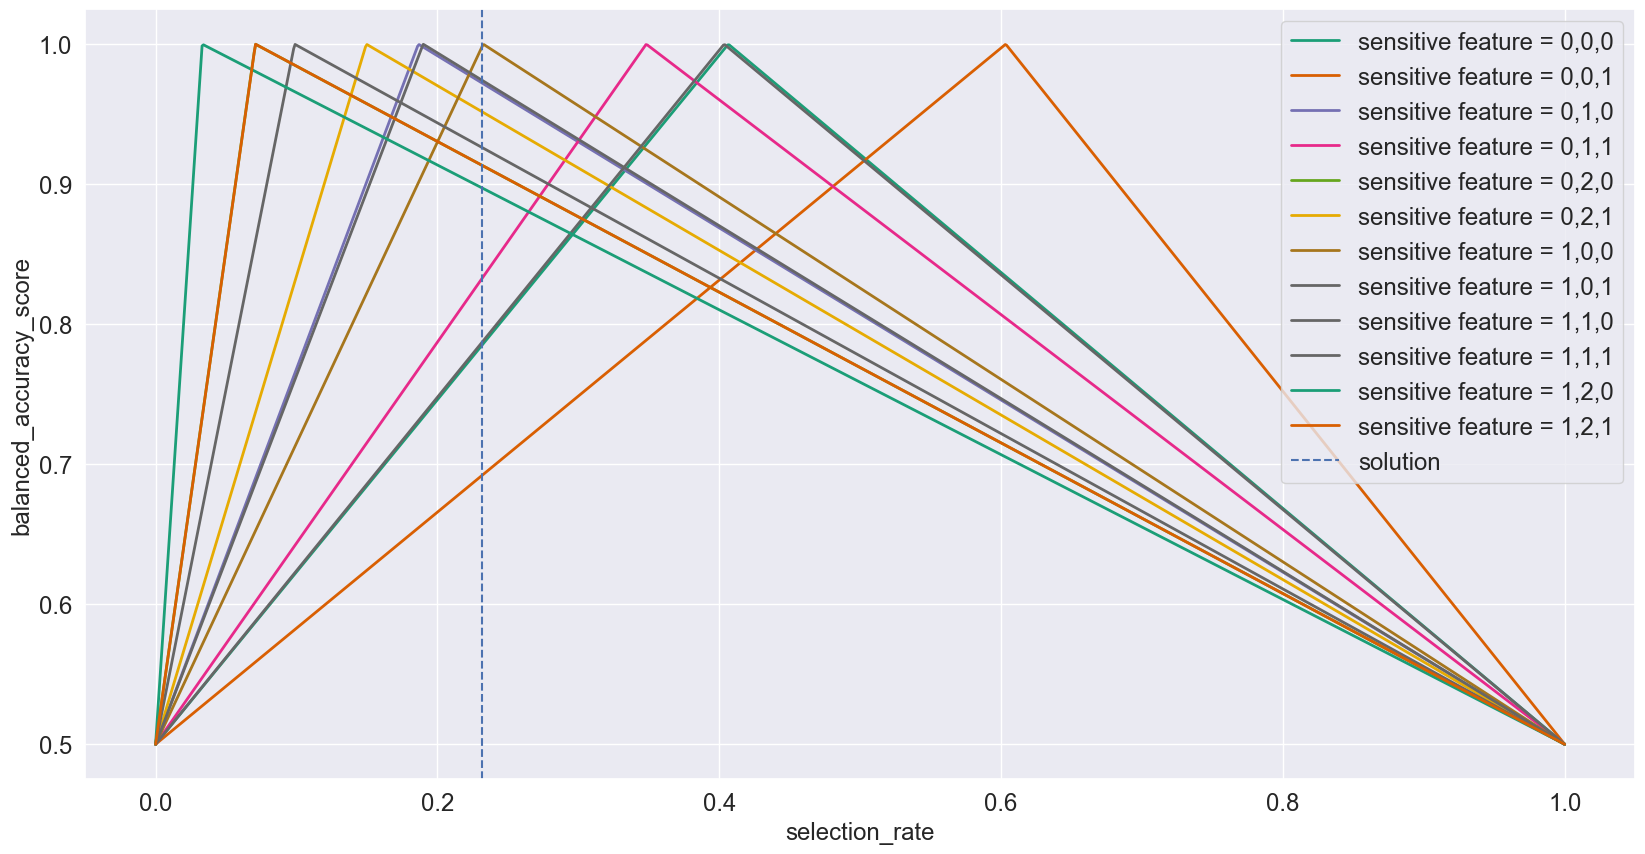

In [20]:
run_test(
    "validmind.data_validation.ProtectedClassesThresholdOptimizer", 
    inputs={
        "dataset": vm_test_ds
    }, 
    params={
        "pipeline":pipeline,
        "protected_classes": protected_classes,
        "X_train":X_train,
        "y_train":y_train,
    },
).log()

### Monitoring Section

In [21]:
#Now let's continue with doing some monitoring and adding metrics over time
df_mon = df = pd.read_csv("lending_club_biased.csv").drop(columns=['total_pymnt'])
df_mon.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,open_acc,total_acc,id,Gender,Race,Marital_Status
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,0.0,credit_card,3.0,9.0,1,Male,White,Single
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,1.0,car,3.0,4.0,2,Female,Asian,Single
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,0.0,small_business,2.0,10.0,3,Male,White,Single
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,0.0,other,10.0,37.0,4,Female,White,Married
4,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,0.0,wedding,9.0,12.0,5,Female,White,Married


In [22]:
#Pre-processing step for prediction purposes
df_mon = df_mon.drop(['id','verification_status','purpose'],axis=1) #remove features we do not want to include for modeling purposes
df_mon2 = df_mon.copy(deep=True)

# Encode categorical variables for modeling purposes
label_encoders = {}
for column in ['term', 'grade', 'sub_grade','emp_length','home_ownership','Gender','Race','Marital_Status']:
    le = LabelEncoder()
    df_mon[column] = le.fit_transform(df_mon[column])
    label_encoders[column] = le

# Display the cleaned and encoded dataset
df_mon.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,open_acc,total_acc,Gender,Race,Marital_Status
0,5000,4975.0,0,10.65,162.87,1,6,1,5,24000.0,0.0,3.0,9.0,1,2,1
1,2500,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1.0,3.0,4.0,0,0,1
2,2400,2400.0,0,15.96,84.33,2,14,1,5,12252.0,0.0,2.0,10.0,1,2,1
3,10000,10000.0,0,13.49,339.31,2,10,1,5,49200.0,0.0,10.0,37.0,0,2,0
4,5000,5000.0,0,7.90,156.46,0,3,3,5,36000.0,0.0,9.0,12.0,0,2,0


In [23]:
#splitting into 10 different datasets
df_preds = np.array_split(df_mon,10)


In [24]:
from datetime import datetime, timedelta
from validmind.api_client import log_metric
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

base_date = datetime.now() - timedelta(days=len(df_preds))

for i in range(len(df_preds)):
    recorded_at = base_date + timedelta(days=i)

    y_pred = model.predict_proba(df_preds[i].drop(columns='loan_status'))
    y_pred_label = model.predict(df_preds[i].drop(columns = 'loan_status'))
    
    #Performance Metrics
    auc = roc_auc_score(df_preds[i]['loan_status'],y_pred[:,1])
    f1 = f1_score(df_preds[i]['loan_status'], y_pred_label, average="macro")
    precision = precision_score(df_preds[i]['loan_status'], y_pred_label, average="macro")
    recall = recall_score(df_preds[i]['loan_status'], y_pred_label, average="macro")
    print(auc,f1,precision,recall)

    #Data Drift Metrics

    log_metric(
        key="demo.metrics.AUC",
        value=auc,
        recorded_at=recorded_at.isoformat(),)

    log_metric(
        key="demo.metrics.F1",
        value=f1,
        recorded_at=recorded_at.isoformat(),)

    log_metric(
        key="demo.metrics.Precision",
        value=precision,
        recorded_at=recorded_at.isoformat(),)

    log_metric(
        key="demo.metrics.Recall",
        value=recall,
        recorded_at=recorded_at.isoformat(),)  




0.9685408720470396 0.9167982744362047 0.9494385818837825 0.8905226946154237
0.9673568580474887 0.9172311040638709 0.949293175039899 0.8912295554630567
0.966060830814975 0.9136946806266513 0.9375103051679838 0.8942362635005716
0.9665648589285026 0.9113693491778516 0.9388803465109767 0.8897587330342693
0.9634388115400774 0.9077187514353868 0.9341425360383463 0.8861843437217429
0.9618173679394659 0.9119658601525606 0.9423254051005281 0.8872729927661054
0.9628103252048835 0.911041063118858 0.9426219699952668 0.8857911372143974
0.9678345771881156 0.917072445083875 0.9403190367411816 0.8977314946906361
0.9660875570079136 0.9128017213762745 0.9365286352508473 0.8934207807954264
0.9644125590114769 0.9111621270916088 0.9360925213647404 0.8909677800058899
